# BMO EDA 2

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import gcp
import gcp.bigquery as bq

## Method of payment to card balances

### Scenario Description

* This scenario purports to detect AML risks in which a money launder may be using money from hard-to-trace source to pay off credit card balance.
* Categorize the credit payments by the payment methods and look for unusual patterns, e.g. consistent or large usage of ACH by a domestic customer to pay off the credit card
* The following fields should be part of transaction data schema.

|Transaction Type|Credit_Debit_Flag|
|---|---|
|Payment|C (Credit)|
|Refund|C|
|Reversal|C|
|Award|C|
|Purchase|D (Debit)|
|Fee|D|
|Interest Charge|D|
|Penalty|D|

|Payment Method|
|---|
|Cash|
|Wire|
|ACH|
|Paper Check|
|e-Check|
|Online Transfer|
|Payment at ATM|

In [172]:
%%sql --module use_case_2

DEFINE QUERY trans_by_type_green
SELECT
  TRANSACTION_TYPE AS trans_type,
  COUNT(*) AS num_trans
FROM
  [CreditCardv2.cc_trans_02052016]
WHERE
  USE_CASE == 'Use Case 2 - Green'
  AND CREDIT_DEBIT == 'C'
GROUP BY
  trans_type
ORDER BY
  num_trans DESC

DEFINE QUERY trans_by_type_yellow
SELECT
  TRANSACTION_TYPE AS trans_type,
  COUNT(*) AS num_trans
FROM
  [CreditCardv2.cc_trans_02052016]
WHERE
  USE_CASE == 'Use Case 2 - Yellow'
  AND CREDIT_DEBIT == 'C'
GROUP BY
  trans_type
ORDER BY
  num_trans DESC

DEFINE QUERY trans_by_type_red
SELECT
  TRANSACTION_TYPE AS trans_type,
  COUNT(*) AS num_trans
FROM
  [CreditCardv2.cc_trans_02052016]
WHERE
  USE_CASE == 'Use Case 2 - Red'
  AND CREDIT_DEBIT == 'C'
GROUP BY
  trans_type
ORDER BY
  num_trans DESC

DEFINE QUERY trans_by_type
SELECT
  USE_CASE as use_case,
  TRANSACTION_TYPE AS trans_type,
  COUNT(*) AS num_trans
FROM
  [CreditCardv2.cc_trans_02052016]
WHERE
  REGEXP_MATCH(USE_CASE, 'Use Case 2')
  AND CREDIT_DEBIT == 'C'
GROUP BY
  trans_type, use_case
ORDER BY
  trans_type, use_case

In [173]:
%bigquery execute --query use_case_2.trans_by_type_green

trans_type,num_trans
Online Transfer,16329172
e-Check Check,16321869
ATM PaymentPaper Check,13991200
ACH Payment,6995617
Payment,5789629
Wire Payment,4665774
ACH PaymentCash Payment,2332970
Paper Check,2332869
ATM Payment,2332031
Cash Payment,2330893


In [174]:
%%chart columns -d use_case_2.trans_by_type_green
height: 500
width: 1000
legend: none

In [175]:
%bigquery execute --query use_case_2.trans_by_type_yellow

trans_type,num_trans
e-Check Check,1291977
ACH Payment,1290448
Online Transfer,1287583
Wire Payment,859280
ATM PaymentPaper Check,858162
Payment,625110
ACH PaymentCash Payment,429694
Cash Payment,429398
ATM Payment,429245
Paper Check,429013


In [176]:
%%chart columns -d use_case_2.trans_by_type_yellow
height: 500
width: 1000
legend: none

In [177]:
%bigquery execute --query use_case_2.trans_by_type_red

trans_type,num_trans
ACH Payment,1126334
Wire Payment,753237
Cash Payment,376810
ATM Payment,376759
ACH PaymentCash Payment,376609
Paper Check,376196
Online Transfer,375450
e-Check Check,375418
Payment,353824


In [178]:
%%chart columns -d use_case_2.trans_by_type_red
height: 500
width: 1000
legend: none

In [179]:
%bigquery execute --query use_case_2.trans_by_type

use_case,trans_type,num_trans
Use Case 2 - Green,ACH Payment,6995617
Use Case 2 - Red,ACH Payment,1126334
Use Case 2 - Yellow,ACH Payment,1290448
Use Case 2 - Green,ACH PaymentCash Payment,2332970
Use Case 2 - Red,ACH PaymentCash Payment,376609
Use Case 2 - Yellow,ACH PaymentCash Payment,429694
Use Case 2 - Green,ATM Payment,2332031
Use Case 2 - Red,ATM Payment,376759
Use Case 2 - Yellow,ATM Payment,429245
Use Case 2 - Green,ATM PaymentPaper Check,13991200


In [180]:
trans_by_type = bq.Query(use_case_2.trans_by_type).to_dataframe()

In [181]:
trans_by_type_pivoted = trans_by_type.pivot('trans_type', 'use_case')
trans_by_type_pivoted = trans_by_type_pivoted.fillna(0)
trans_by_type_pivoted

num_trans                   \
use_case                Use Case 2 - Green Use Case 2 - Red   
trans_type                                                    
ACH Payment                        6995617          1126334   
ACH PaymentCash Payment            2332970           376609   
ATM Payment                        2332031           376759   
ATM PaymentPaper Check            13991200                0   
Cash Payment                       2330893           376810   
Online Transfer                   16329172           375450   
Paper Check                        2332869           376196   
Payment                            5789629           353824   
Wire Payment                       4665774           753237   
e-Check Check                     16321869           375418   

                                             
use_case                Use Case 2 - Yellow  
trans_type                                   
ACH Payment                         1290448  
ACH PaymentCash Payment              429694  
ATM Payment                          429245  
ATM PaymentPaper Check               858162  
Cash Payment                         429398  
Online Transfer                     1287583  
Paper Check                          429013  
Payment                              625110  
Wire Payment                         859280  
e-Check Check                       1291977

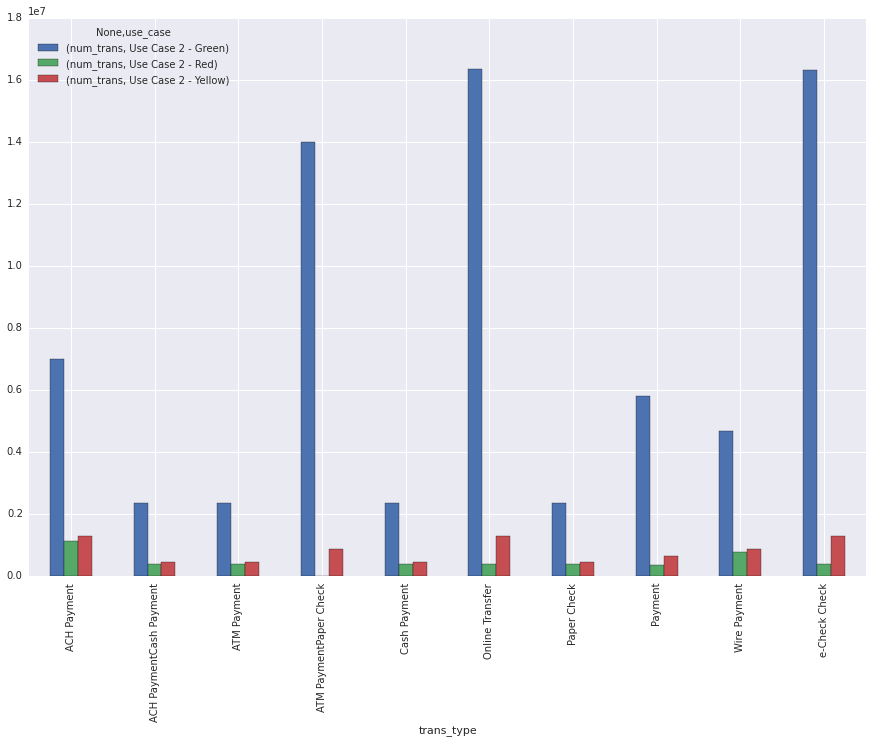

In [182]:
_ = trans_by_type_pivoted.plot(kind='bar', figsize=(15,10))

In [183]:
'''trans_by_type_pivoted = trans_by_type_pivoted.divide(trans_by_type_pivoted.sum(axis=0), axis=0)
trans_by_type_pivoted'''

sum = trans_by_type_pivoted.sum(axis=0)
sum

           use_case           
num_trans  Use Case 2 - Green     73422024
           Use Case 2 - Red        4490637
           Use Case 2 - Yellow     7929910
dtype: float64

In [184]:
trans_by_type_pivoted = trans_by_type_pivoted.divide(sum, axis=1) * 100
trans_by_type_pivoted

num_trans                   \
use_case                Use Case 2 - Green Use Case 2 - Red   
trans_type                                                    
ACH Payment                       9.527954        25.081831   
ACH PaymentCash Payment           3.177480         8.386538   
ATM Payment                       3.176201         8.389879   
ATM PaymentPaper Check           19.055863         0.000000   
Cash Payment                      3.174651         8.391014   
Online Transfer                  22.240155         8.360729   
Paper Check                       3.177342         8.377342   
Payment                           7.885412         7.879149   
Wire Payment                      6.354734        16.773500   
e-Check Check                    22.230208         8.360017   

                                             
use_case                Use Case 2 - Yellow  
trans_type                                   
ACH Payment                       16.273173  
ACH PaymentCash Payment            5.418649  
ATM Payment                        5.412987  
ATM PaymentPaper Check            10.821838  
Cash Payment                       5.414916  
Online Transfer                   16.237044  
Paper Check                        5.410061  
Payment                            7.882939  
Wire Payment                      10.835936  
e-Check Check                     16.292455

In [185]:
trans_by_type_pivoted.sum()

           use_case           
num_trans  Use Case 2 - Green     100
           Use Case 2 - Red       100
           Use Case 2 - Yellow    100
dtype: float64

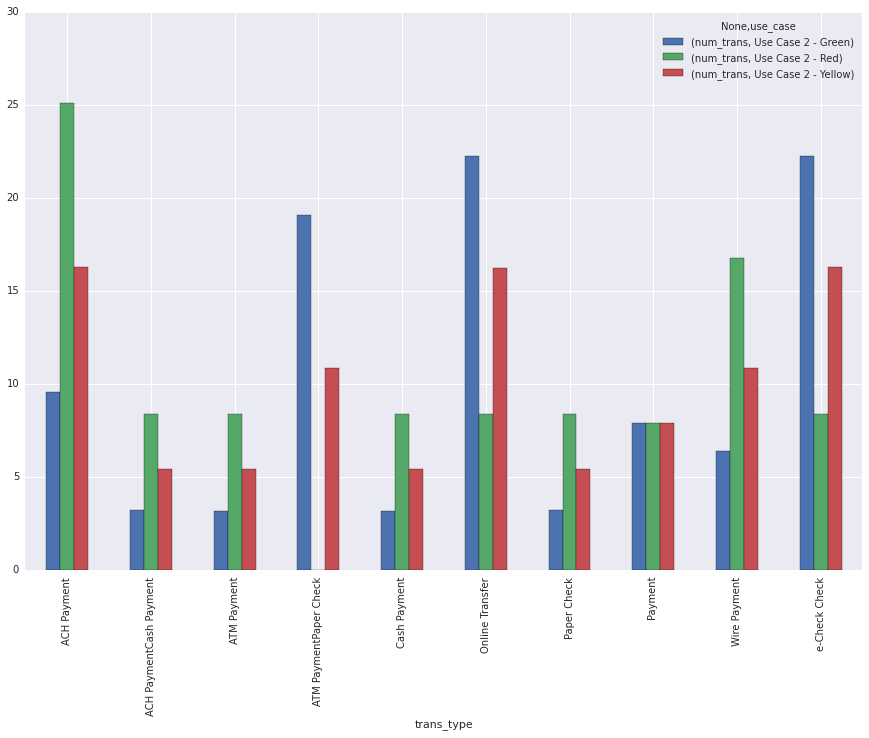

In [186]:
_ = trans_by_type_pivoted.plot(kind='bar', figsize=(15,10))

In [193]:
%%sql --module use_case_2

DEFINE QUERY sample_trans
SELECT
  *
FROM
  [CreditCardv2.cc_trans_02052016]
WHERE
  ACCOUNTID = '116715244'
ORDER BY
  TRANSACTION_DATE,
  POST_DATE

DEFINE QUERY sample_account
SELECT
  *
FROM
  [CreditCardv2.Customer_Data_Jan26]
WHERE
  ACCOUNTID = '116715244'

In [191]:
%bigquery execute --query use_case_2.sample_trans

ROWNUM,ACCOUNTID,MERCHANT_NAME,MERCHANT_CATEGORY_CODE,MERCHANT_CATEGORY_DESC,MERCHANT_COUNTRY,POST_DATE,TRANSACTION_DATE,TRANSACTION_TYPE,CREDIT_DEBIT,CREDIT_LIMIT,AMOUNT,BALANCE,CREDITCARDNUMBER,CC_TYPE,USE_CASE,CUST_NAME,NUM_CCS,CUST_CITY,CUST_STATE,CUST_ZIP,CUST_COUNTRY,TRANS_DETAIL
0_2016-02-04 21:25:52,116715244,Power Digital Resource,3030,Airlines,US,2015-01-02,2015-01-01,Purchase,D,24000,19458,4542,95412358441345558,mastercard,Use Case 2 - Green,Gunner Quitzon,3,MIAMI,FL,33161,US,
1_2016-02-04 21:25:52,116715244,Pacific Frontier,3272,Airlines,US,2015-01-05,2015-01-04,Penalty,D,24000,3268,1274,95412358441345558,mastercard,Use Case 2 - Green,Gunner Quitzon,3,MIAMI,FL,33161,US,
2_2016-02-04 21:25:52,116715244,,1111,Customer Payment,US,2015-01-07,2015-01-06,ACH PaymentCash Payment,C,24000,11,1285,95412358441345558,mastercard,Use Case 2 - Green,Gunner Quitzon,3,MIAMI,FL,33161,US,
3_2016-02-04 21:25:52,116715244,,1111,Customer Payment,US,2015-01-10,2015-01-09,Cash Payment,C,24000,936,2221,95412358441345558,mastercard,Use Case 2 - Green,Gunner Quitzon,3,MIAMI,FL,33161,US,
4_2016-02-04 21:25:52,116715244,,1111,Customer Payment,US,2015-01-13,2015-01-12,ACH Payment,C,24000,191,2412,95412358441345558,mastercard,Use Case 2 - Green,Gunner Quitzon,3,MIAMI,FL,33161,US,
5_2016-02-04 21:25:52,116715244,,1111,Customer Payment,US,2015-01-16,2015-01-15,ATM PaymentPaper Check,C,24000,209,2621,95412358441345558,mastercard,Use Case 2 - Green,Gunner Quitzon,3,MIAMI,FL,33161,US,
6_2016-02-04 21:25:52,116715244,,1111,Customer Payment,US,2015-01-18,2015-01-17,ATM PaymentPaper Check,C,24000,2337,4958,95412358441345558,mastercard,Use Case 2 - Green,Gunner Quitzon,3,MIAMI,FL,33161,US,
7_2016-02-04 21:25:52,116715244,,1111,Customer Payment,US,2015-01-21,2015-01-20,ACH Payment,C,24000,3199,8157,95412358441345558,mastercard,Use Case 2 - Green,Gunner Quitzon,3,MIAMI,FL,33161,US,
8_2016-02-04 21:25:52,116715244,,1111,Customer Payment,US,2015-01-22,2015-01-21,Online Transfer,C,24000,6101,14258,95412358441345558,mastercard,Use Case 2 - Green,Gunner Quitzon,3,MIAMI,FL,33161,US,
9_2016-02-04 21:25:52,116715244,,1111,Customer Payment,US,2015-01-24,2015-01-23,ATM PaymentPaper Check,C,24000,10257,24515,95412358441345558,mastercard,Use Case 2 - Green,Gunner Quitzon,3,MIAMI,FL,33161,US,


In [194]:
%bigquery execute --query use_case_2.sample_account

ROWNUM,ACCOUNTID,ACCT_TYPE,NUM_CCS,NAME,M_NAME,SSN,AUTHORIZED_NAME2,M_NAME2,SSN2,AUTHORIZED_NAME3,M_NAME3,SSN3,AUTHORIZED_NAME4,M_NAME4,SSN4,CREDITCARDNUMBER,CREDITCARDTYPE,EMPLOYER,CUSTEMAIL,OCCUPATION,CITY,STATE,ZIP,COUNTRY,PREVIOUS_CITY,PREVIOUS_STATE,PREVIOUS_ZIP,PREVIOUS_COUNTRY,DOB,PEP,SAR,CLOSEDACCOUNT,RELATED_ACCT,RELATED_TYPE,PARTY_TYPE,PARTY_RELATION,PARTY_STARTDATE,PARTY_ENDDATE,LARGE_CASH_EXEMPT,DEMARKET_FLAG,DEMARKET_DATE,PROB_DEFAULT_RISKR,OFFICIAL_LANG_PREF,CONSENT_SHARING,PREFERRED_CHANNEL,PRIMARY_BRANCH_NO,DEPENDANTS_COUNT,SEG_MODEL_ID,SEG_MODEL_TYPE,SEG_MODEL_NAME,SEG_MODEL_GROUP,SEG_M_GRP_DESC,SEG_MODEL_SCORE,ARMS_MANUFACTURER,AUCTION,CASHINTENSIVE_BUSINESS,CASINO_GAMBLING,CHANNEL_ONBOARDING,CHANNEL_ONGOING_TRANSACTIONS,CLIENT_NET_WORTH,COMPLEX_HI_VEHICLE,DEALER_PRECIOUS_METAL,DIGITAL_PM_OPERATOR,EMBASSY_CONSULATE,EXCHANGE_CURRENCY,FOREIGN_FINANCIAL_INSTITUTION,FOREIGN_GOVERNMENT,FOREIGN_NONBANK_FINANCIAL_INSTITUTION,INTERNET_GAMBLING,MEDICAL_MARIJUANA_DISPENSARY,MONEY_SERVICE_BUSINESS,NAICS_CODE,NONREGULATED_FINANCIAL_INSTITUTION,NOT_PROFIT,PRIVATELY_ATM_OPERATOR,PRODUCTS,SALES_USED_VEHICLES,SERVICES,SIC_CODE,STOCK_MARKET_LISTING,THIRD_PARTY_PAYMENT_PROCESSOR,TRANSACTING_PROVIDER,HIGH_NET_WORTH,HIGH_RISK,RISK_RATING,USE_CASE_SCENARIO
17654305,116715244,C,3,Gunner Quitzon,Chantel,726434035,Giana Yundt,Geoffrey,822146970,Braiden Hagenes,Aron,545833759,,,,95412358441345558,mastercard,Star Universal Galaxy Mickens,L.Giles@velquis.eu,Medical Radiologist Therapeutic,MIAMI,FL,33161,US,MILWAUKEE,WI,53215,US,1977-12-16,No,No,No,,,Person,Non-Customer,2013-11-21 23:58:44.135047,2014-11-11 23:58:44.135058,No,No,,50,English,No,,33161,1,02,Profitability,CRS Risk Score,Group 1,Mid Risk Tier,300,,,,,Not Applicable,Mail,567635,,,,,,,,,,,,323111 Printing letterpress (except books grey goods),,,,Credit Card,,Retirement Plans,6722 Management Investment Offices Open-End,Not Found,,,No,No,,9


So, plenty of signal seemingly...

## What would our model look like..?